In [ ]:
!nvidia-smi

Thu May  6 09:14:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [ ]:
train_images.shape, len(train_labels), test_images.shape, len(test_labels)

((60000, 28, 28), 60000, (10000, 28, 28), 10000)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0 

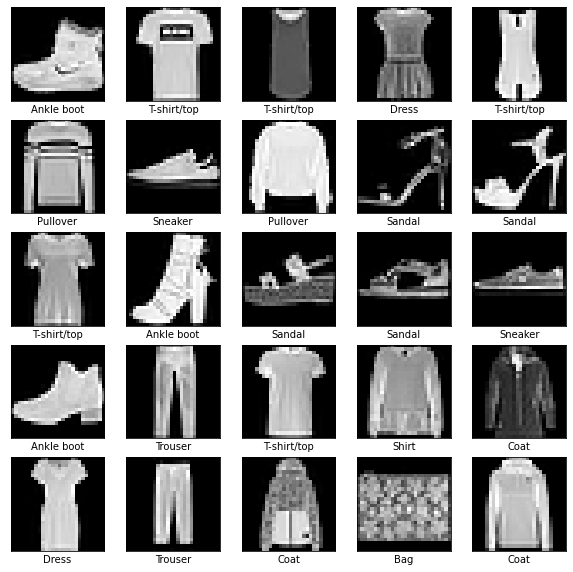

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 28x28 -> 784
    keras.layers.Dense(128, activation='sigmoid'), # (784,128)
    keras.layers.Dense(10, activation='softmax') # (128,10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
EPOCHS = 5

In [ ]:
hist = model.fit(train_images, train_labels, epochs=EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.7307 - accuracy: 0.7594
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4046 - accuracy: 0.8543
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3561 - accuracy: 0.8705
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3272 - accuracy: 0.8820
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3066 - accuracy: 0.8878


**step, iteration, batch, epoch**

**Q. batch_size?**

In [ ]:
60000/1875

32.0

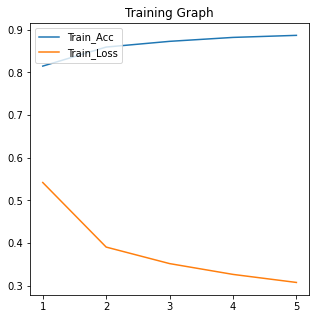

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(range(1,EPOCHS+1), hist.history['accuracy'], label="Train_Acc")
plt.plot(range(1,EPOCHS+1), hist.history['loss'], label="Train_Loss")\

plt.title("Training Graph")
plt.xticks(range(1,EPOCHS+1), range(1,EPOCHS+1))
plt.legend(loc=2)

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3711 - accuracy: 0.8642

테스트 정확도: 0.8641999959945679


In [ ]:
predictions = model.predict(test_images)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

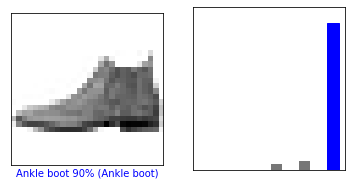

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

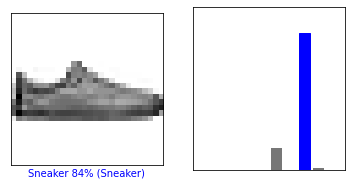

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

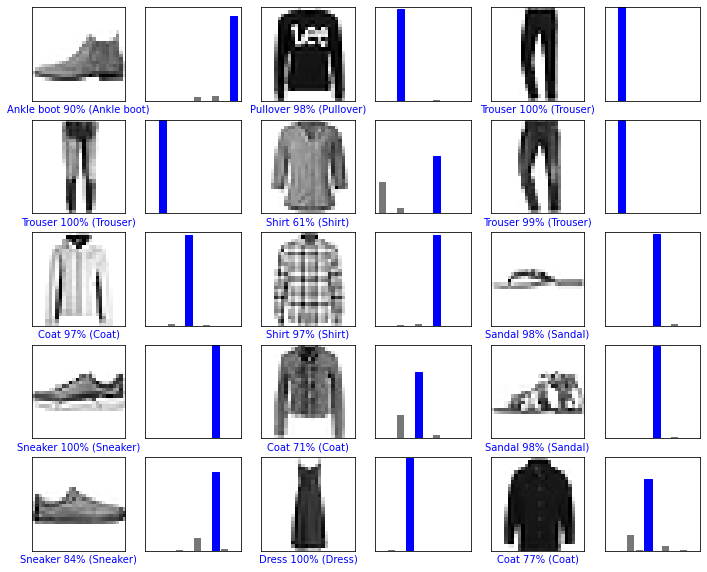

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

**normalization**

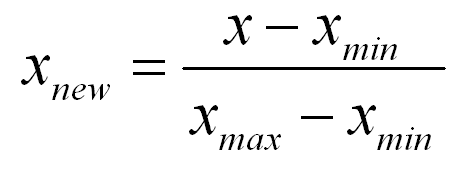

**standardization**

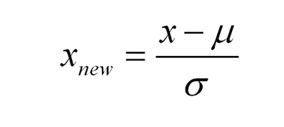

**문제 1**

**1. mean = 0.5, std = 0.5로 train, test data standardization**

**2. Input layer(Flatten), Output layer(Dense(10)) 사이에 2개의 Dense layer 사용, 각각의 kernel 수 : [64, 128]**

**3. activation 함수 relu로 변경**

**4. loss 함수로 categorical_crossentropy 사용(label 값 one-hot encoding으로 변경)**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
####################################### 
train_images = (train_images / 255.0 - 0.5) / 0.5
test_images = (test_images / 255.0 - 0.5) / 0.5  
train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)
####################################### 

In [ ]:
model2 = keras.Sequential([
    #######################################                        
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ####################################### 
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
####################################### 
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
####################################### 
EPOCHS = 5

In [ ]:
hist2 = model2.fit(train_images, train_labels, epochs=EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6219 - accuracy: 0.7772
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3848 - accuracy: 0.8580
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3404 - accuracy: 0.8728
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3164 - accuracy: 0.8822
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2974 - accuracy: 0.8882


In [ ]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3531 - accuracy: 0.8723

테스트 정확도: 0.8723000288009644


**TCT 실기 1번**

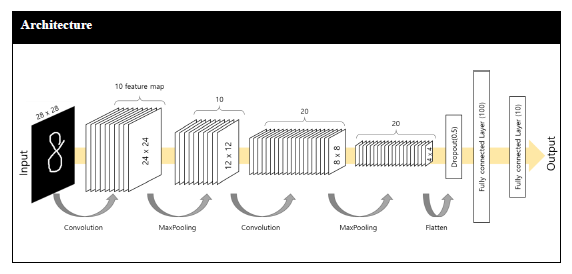

In [ ]:
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model3 = Sequential([
##### 여기에 코드를 작성하세요 #####
Conv2D(10, 5, input_shape=(28, 28, 1)),
MaxPool2D(),
Conv2D(20, 5,),
MaxPool2D(),
Flatten(),
Dropout(0.5),
Dense(100),
Dense(10)
#####################################
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 320)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

**추가**

**padding**


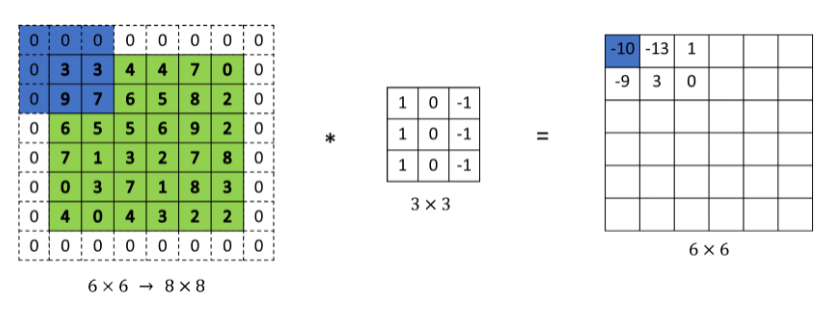

**pooling**

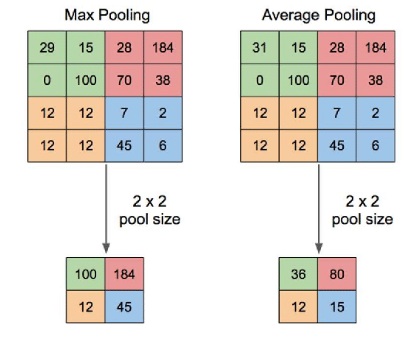

**stride**


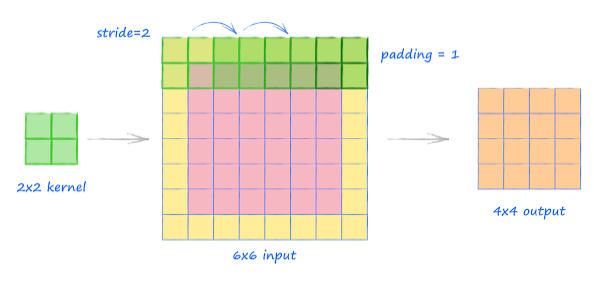

In [ ]:
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
model4 = Sequential()

model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(MaxPool2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(15, activation='relu'))

model4.add(Dense(10, activation='softmax'))
model4.summary()

**문제 2**

**Functional Model로 변경**

In [1]:
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
inputs = Input(shape=(28,28,1))
#####################################
x = Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1))(inputs)
x = MaxPool2D((2, 2))(x)
x = Flatten()(x)
x = Dense(15, activation='relu')(x)
#####################################
outputs = Dense(10, activation='softmax')(x)
model5 = Model(inputs, outputs)
model5.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 15)                40575     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 40,895
Trainable params: 40,895
Non-trainable params: 0
_________________________________________________________

In [2]:
type(model4), type(model5)

tensorflow.python.keras.engine.functional.Functional